In [1]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt

In [2]:
def plt_img(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img,'gray')
    plt.show()
    
def im_threshold(img):
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    return img

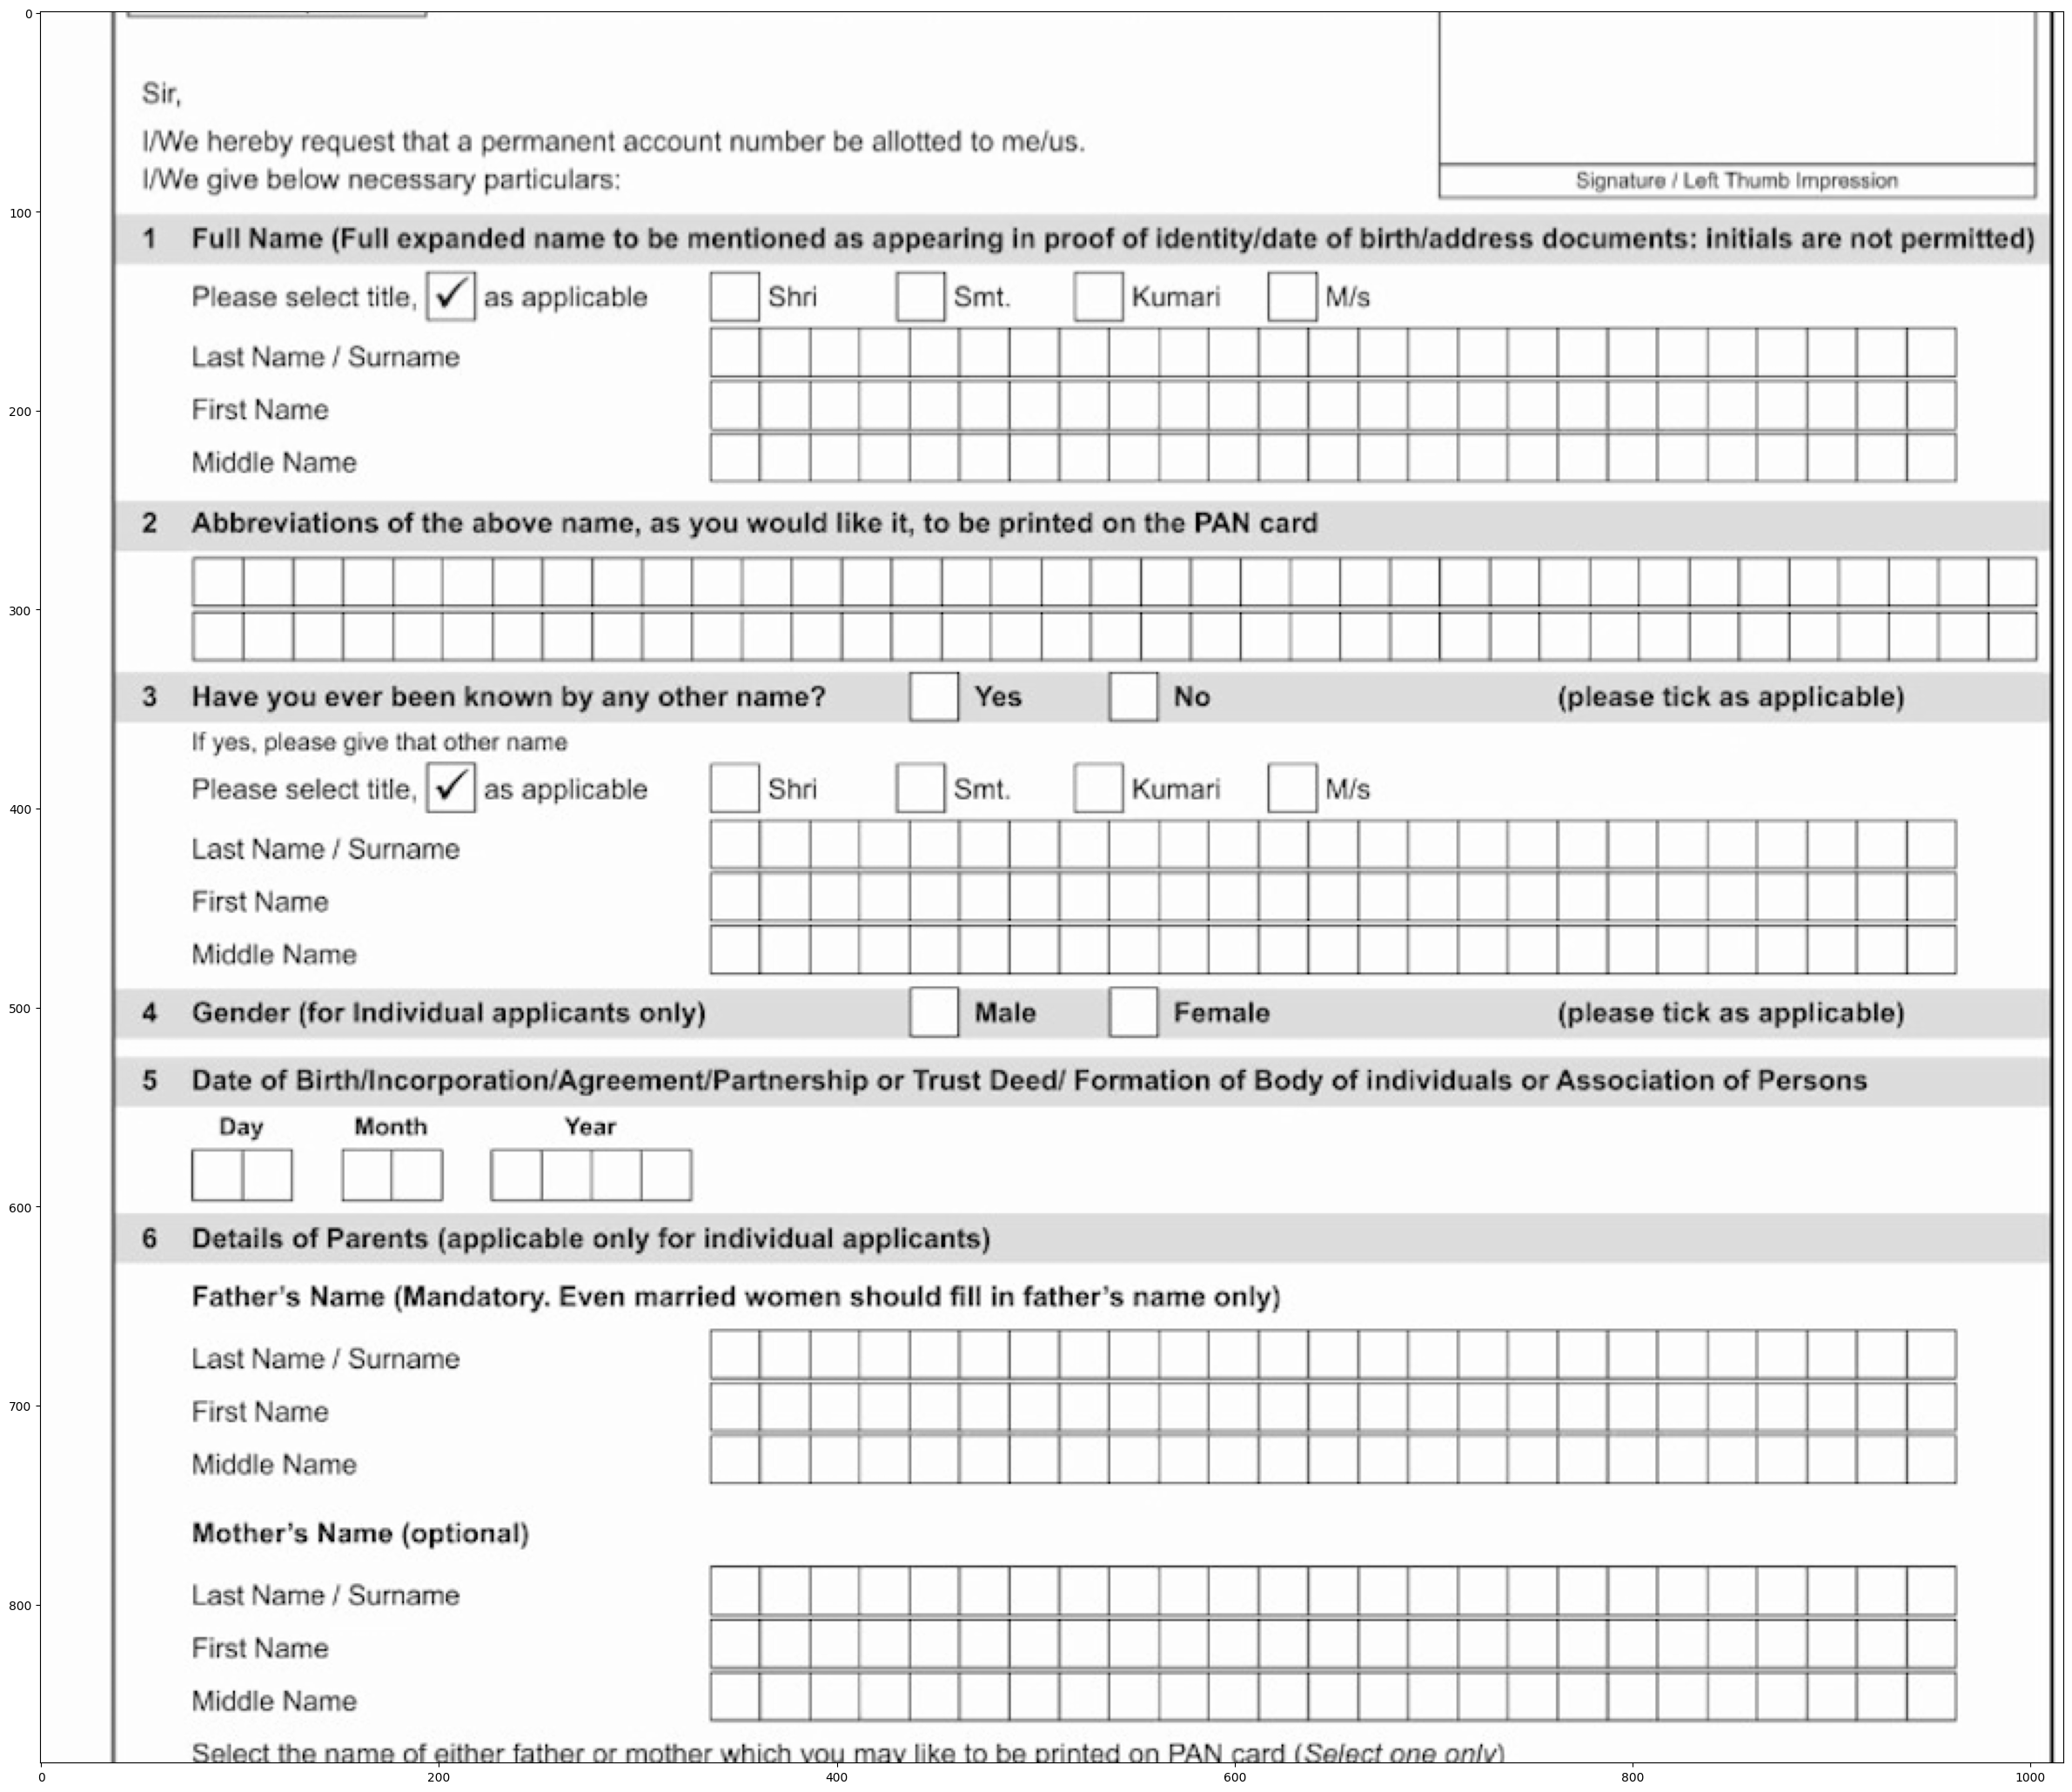

In [5]:
img = cv2.imread("./test_images/manyboxes.png", cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
 
font = cv2.FONT_HERSHEY_COMPLEX

document_height, document_width = img.shape[0], img.shape[1]
 
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.017*cv2.arcLength(cnt, True), True)
    coords = approx.ravel()
    x = coords[0]
    y = coords[1]
    
    #If quadrilateral
    if len(approx) == 4:
        feature_height, feature_width = (coords[1] - coords[3]), (coords[6] - coords[0])
        #If the size of the quadrilateral found is significant (e.g. not hidden inside text)
        if feature_width > document_width*0.002: 
            if feature_height == feature_width:
    #                 print(approx)
    #                 print('*******************')
                    crop_img = img[coords[1]:coords[5], coords[0]:coords[4]]
                    print(coords[1], coords[5])
#                     plt_img(crop_img)
                    _, crop_thresh = cv2.threshold(crop_img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#                     cv2.drawContours(img, [approx], 0, (0), 5)
#                     cv2.putText(img, "Square", (x, y), font, 1, (0))
                    total = crop_thresh.shape[0] * crop_thresh.shape[1]
                    count_empty = total - cv2.countNonZero(crop_thresh)
#                     print('*******************')
#                     plt_img(crop_thresh)
#                     print(ratio, total)
#                     print('*******************')
                    if count_empty > total/3:
                        cv2.drawContours(img, [approx], 0, (0), 5)
                        cv2.putText(img, "Filled", (x, y), font, 0.5, (0))
                    else:
                        cv2.drawContours(img, [approx], 0, (0), 5)
                        cv2.putText(img, "Empty", (x, y), font, 0.5, (0))
 
plt_img(img)

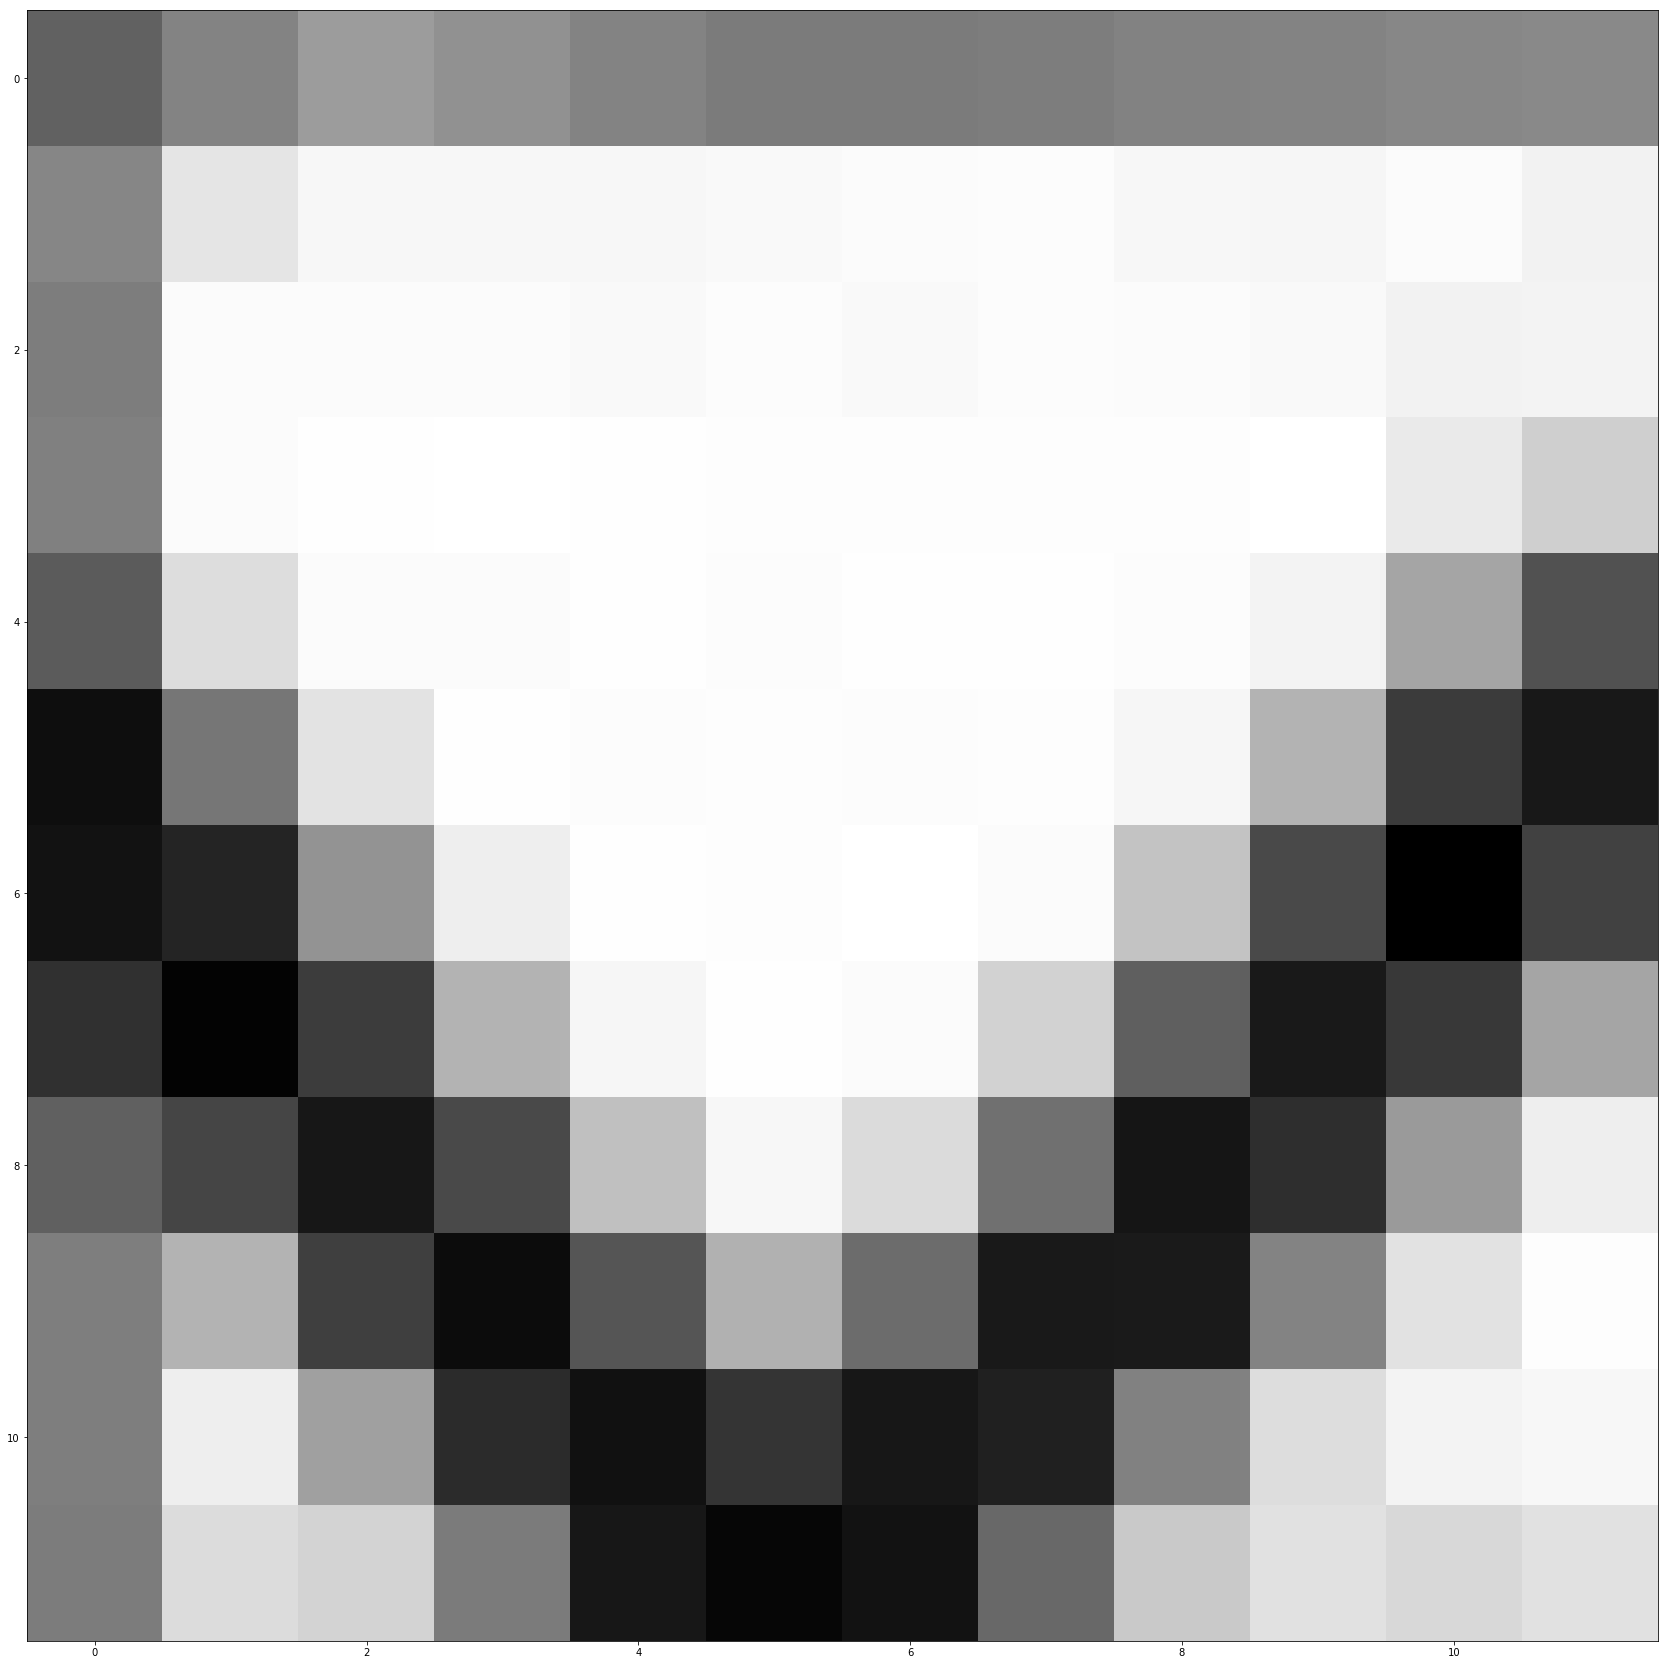

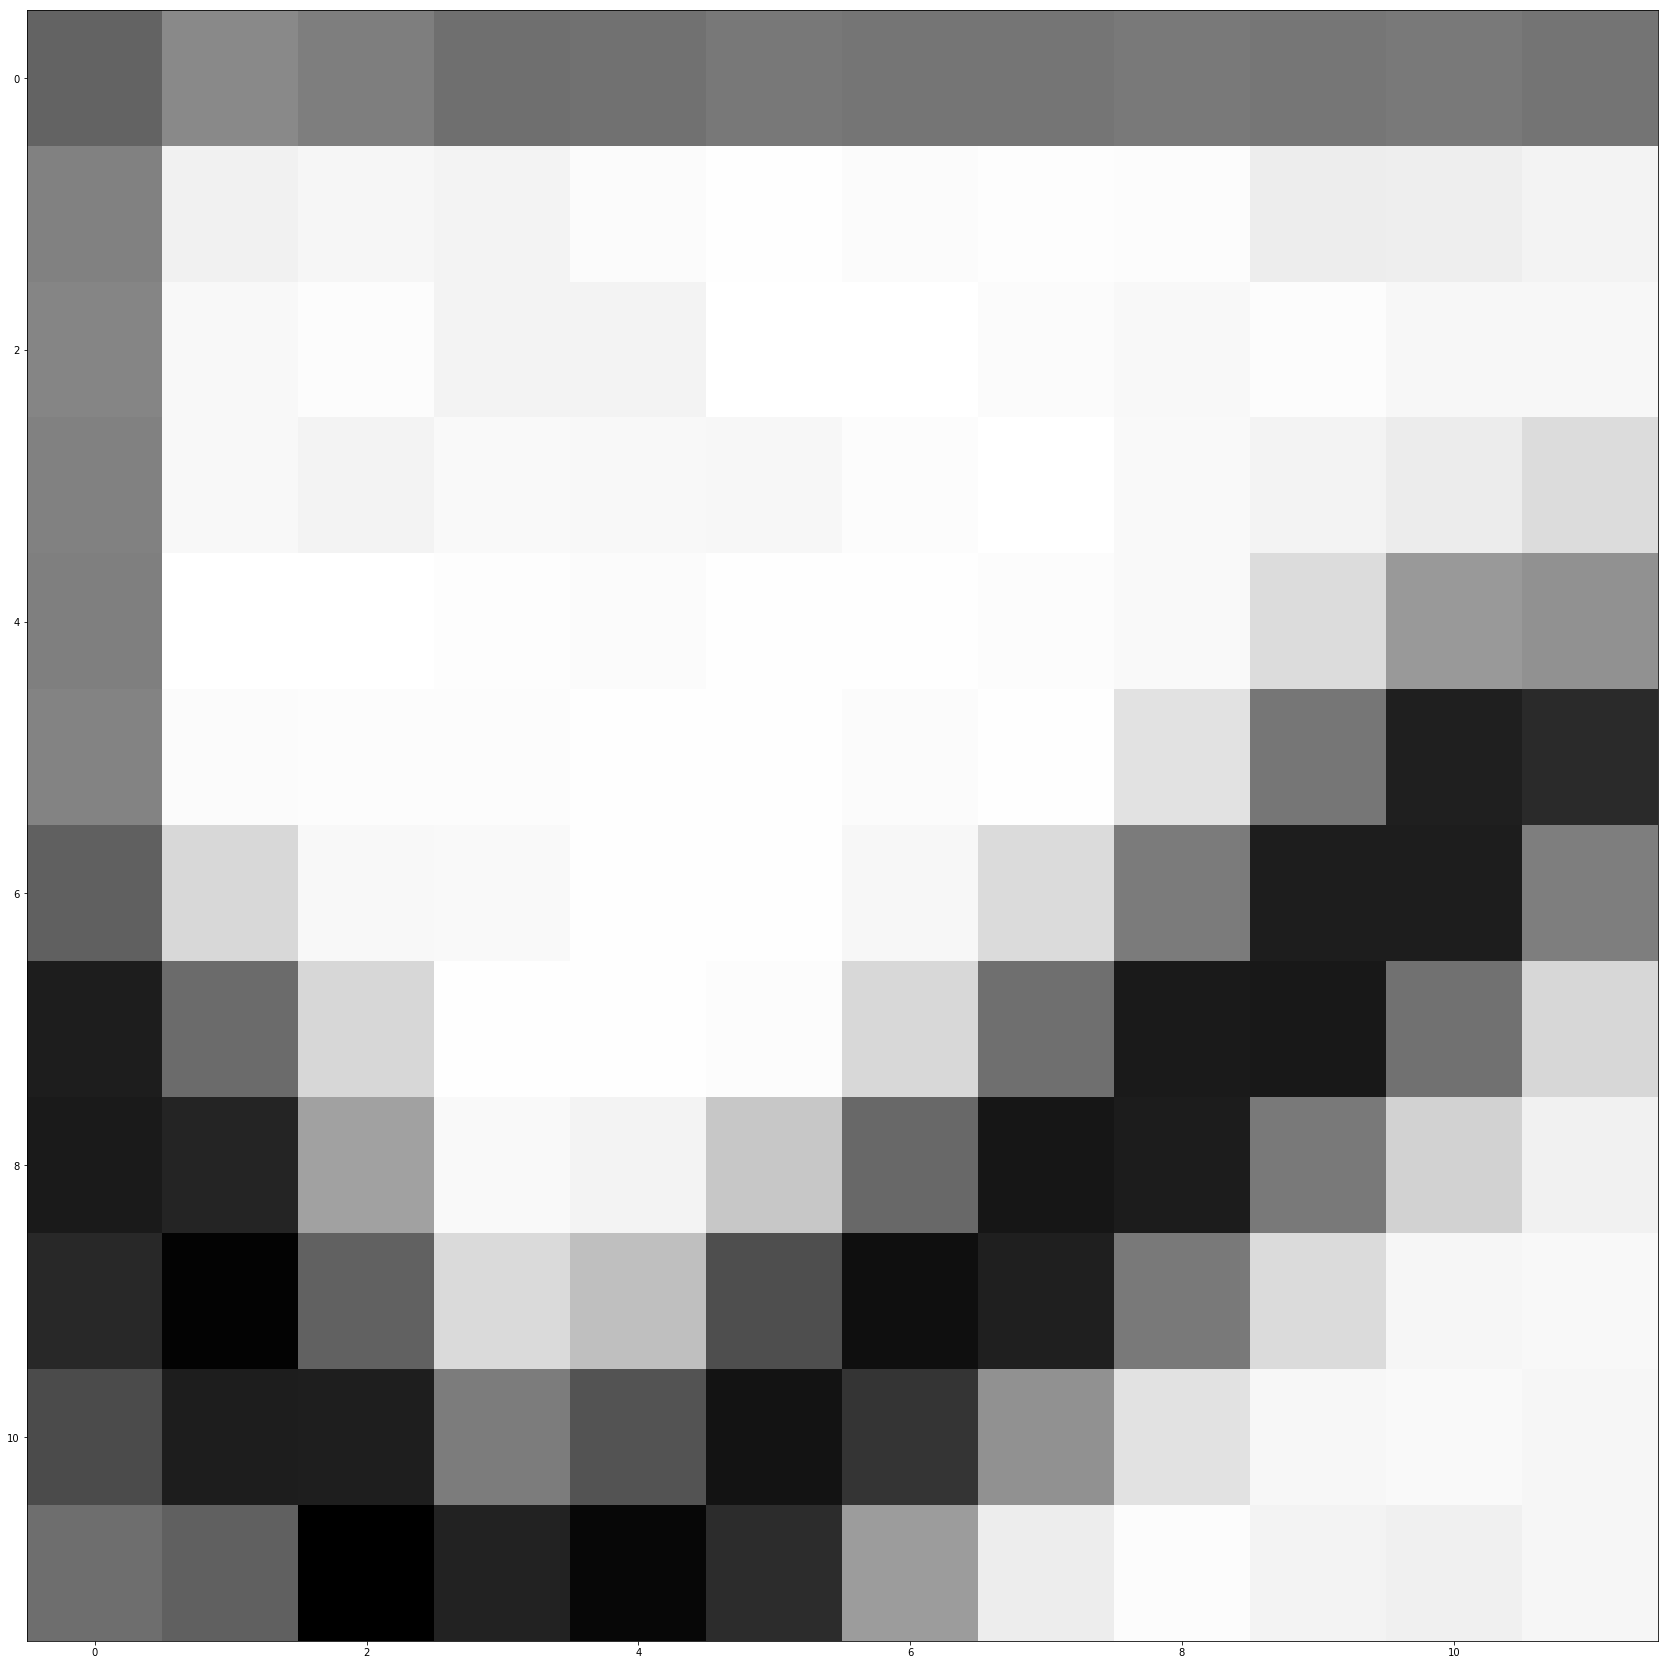

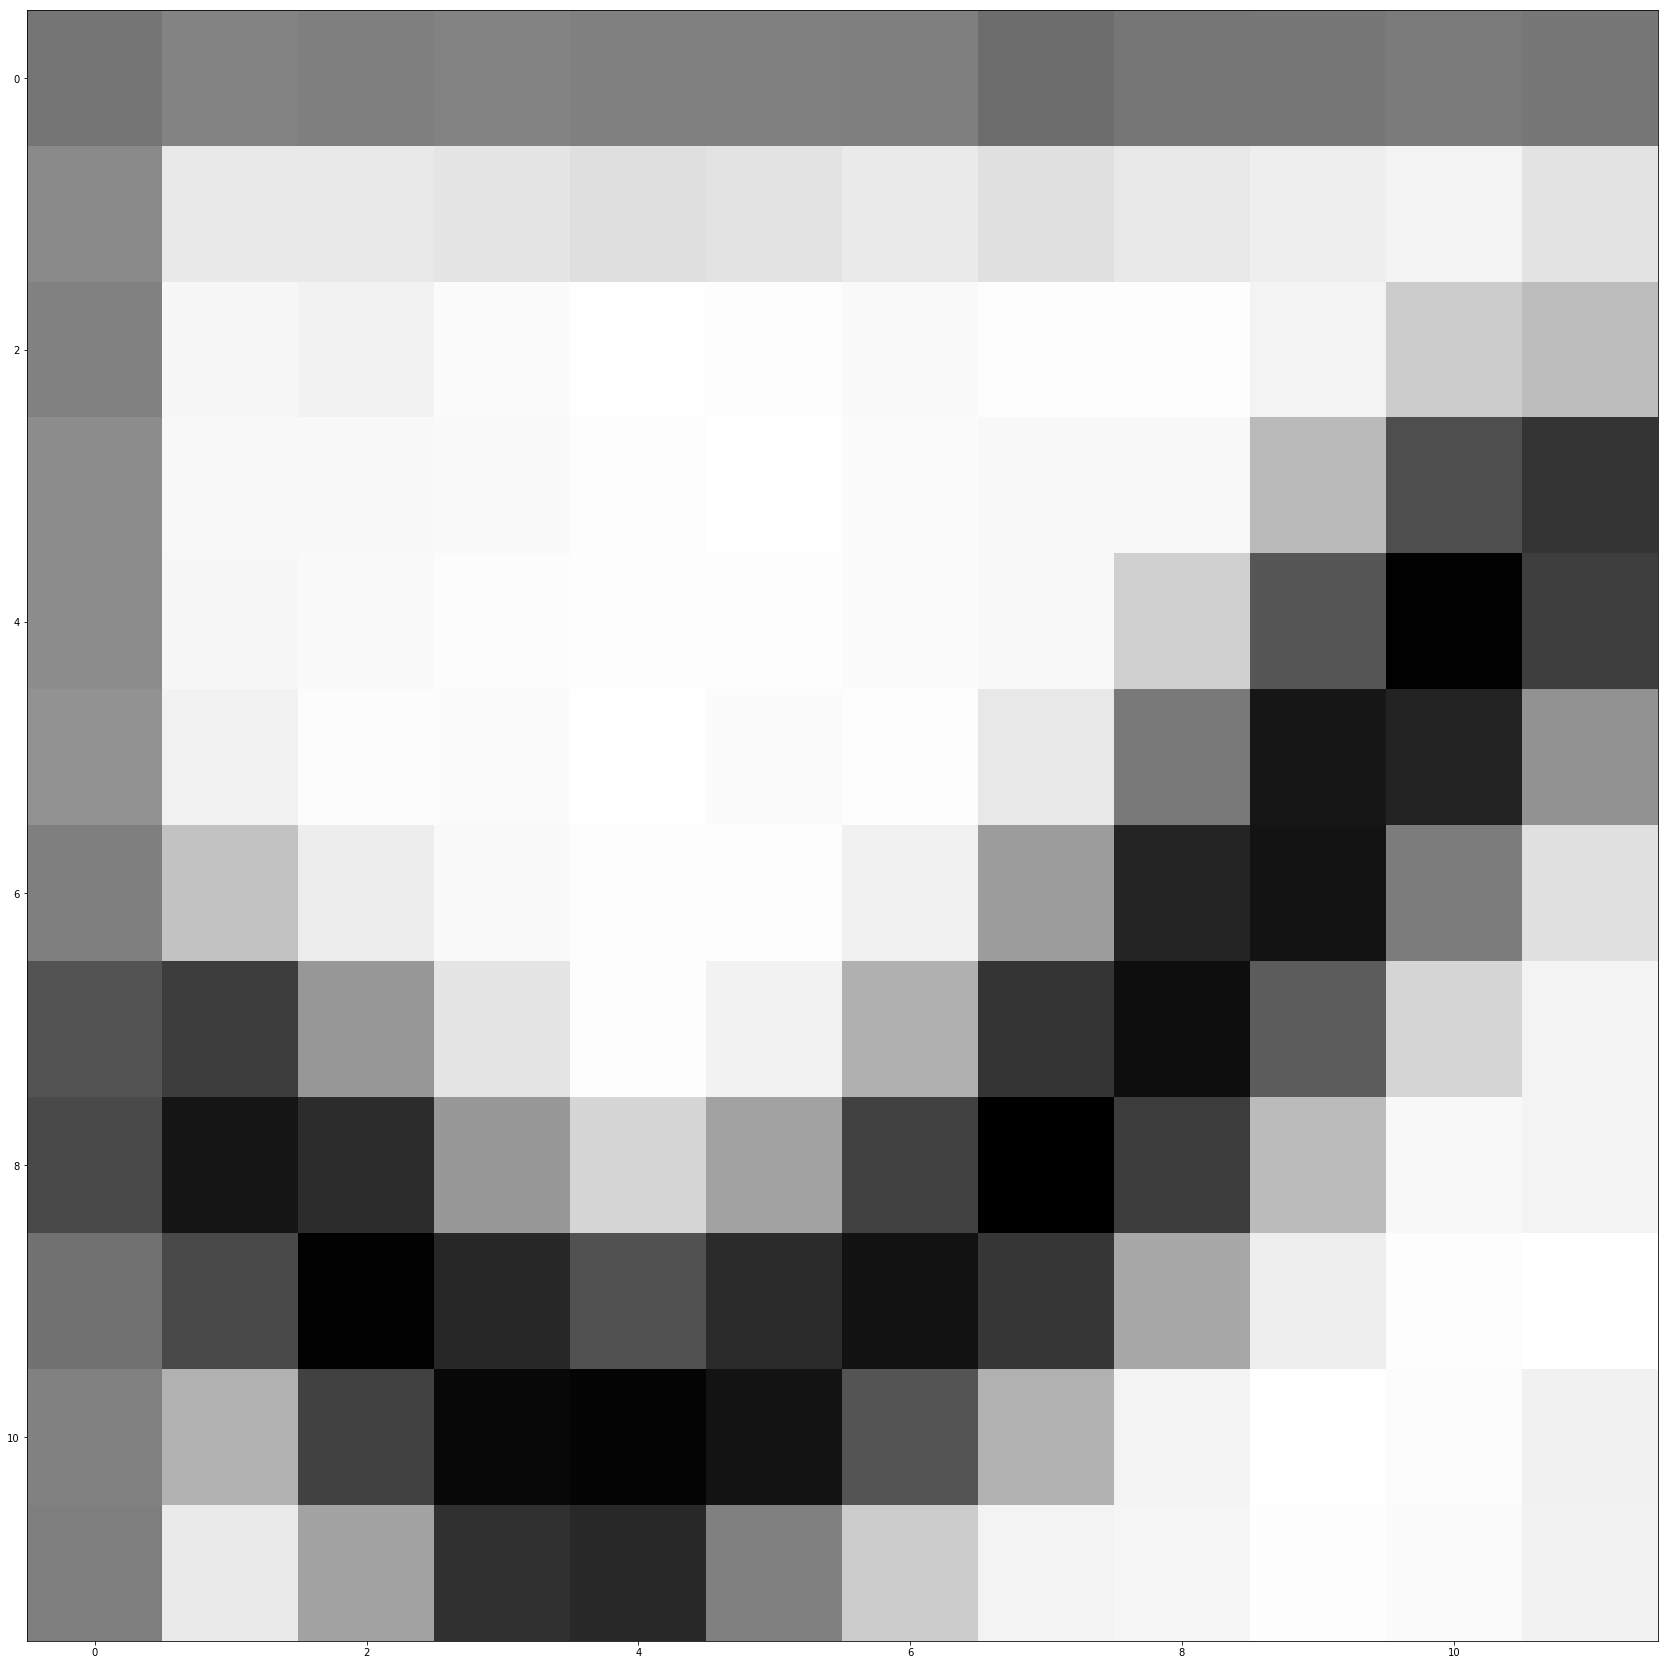

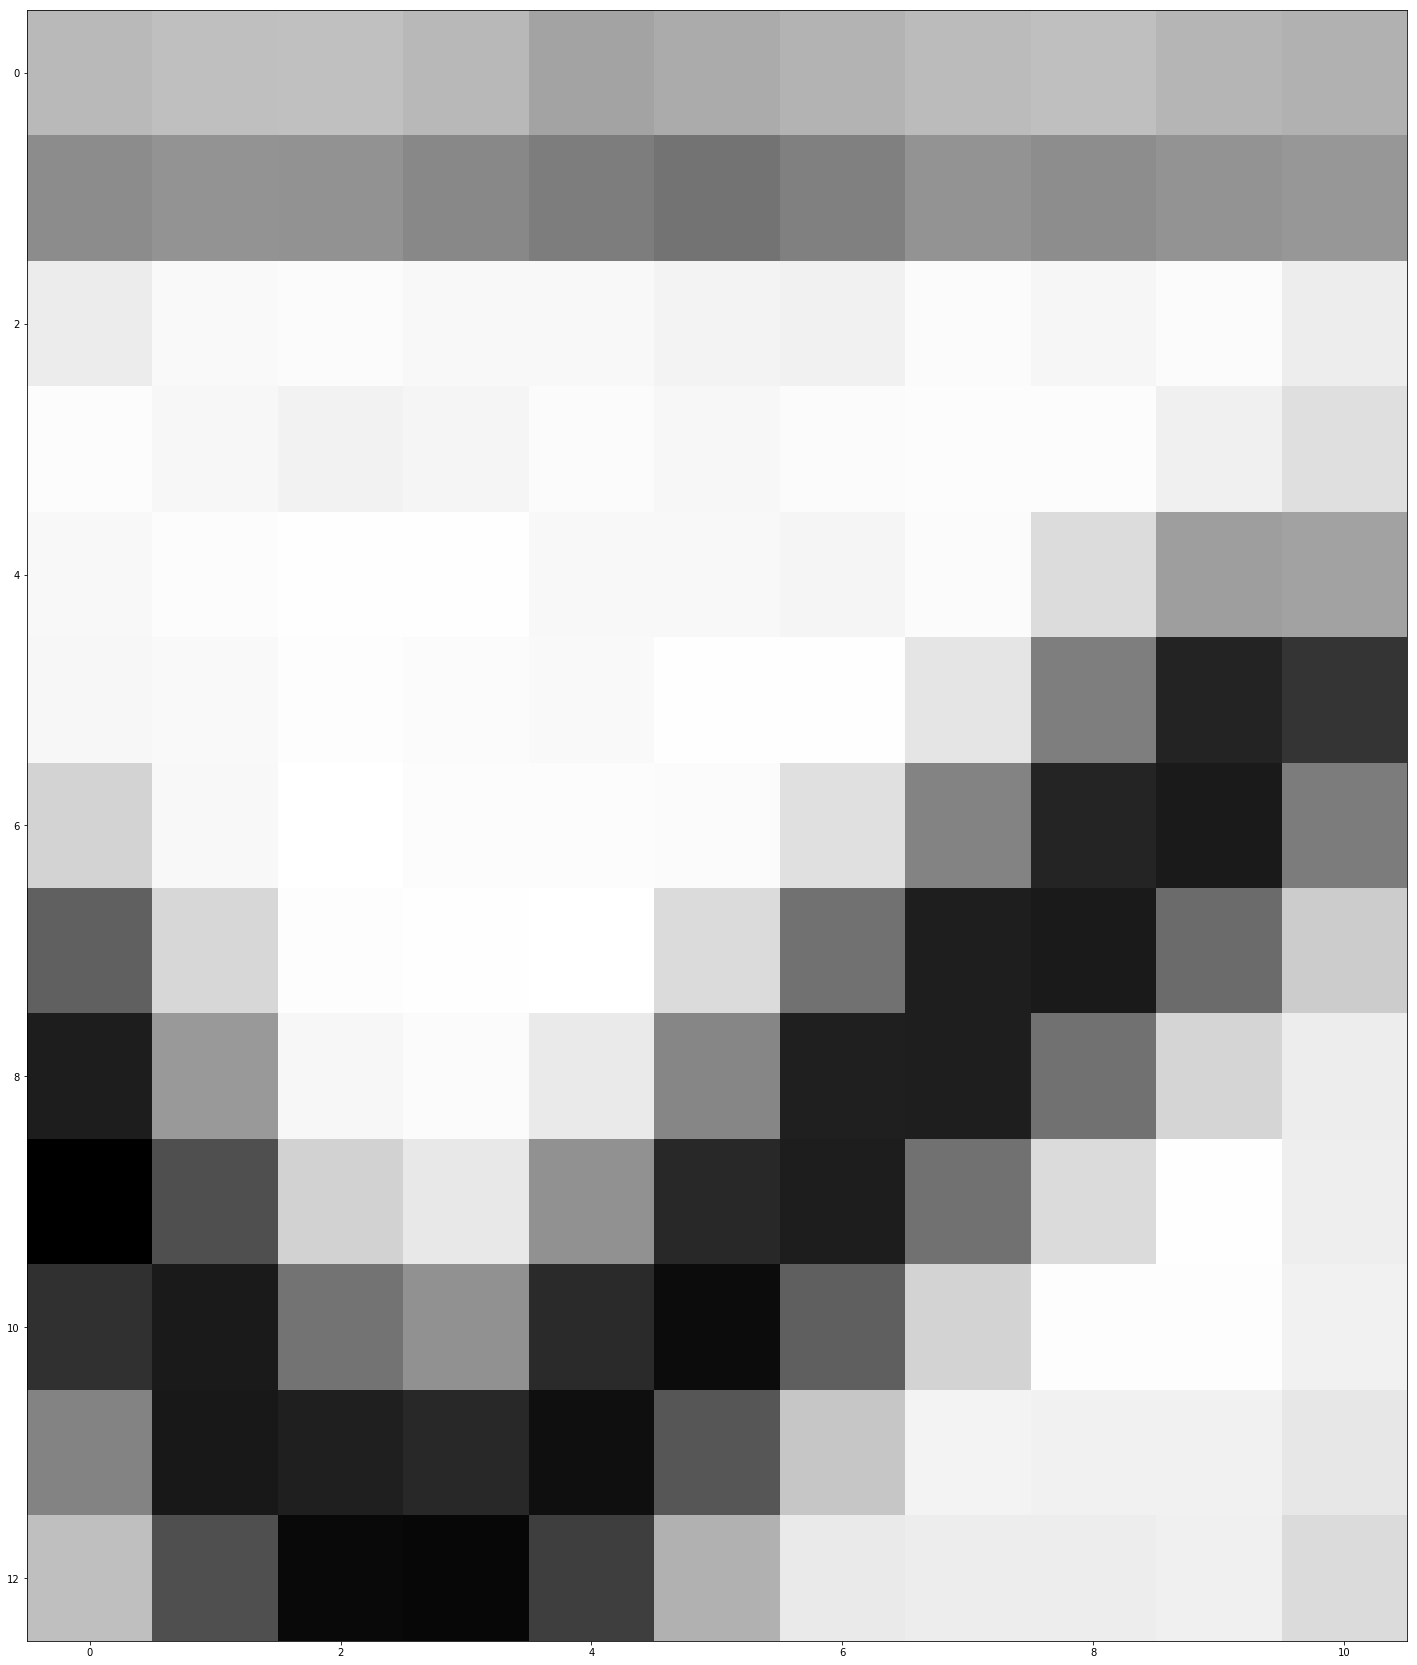

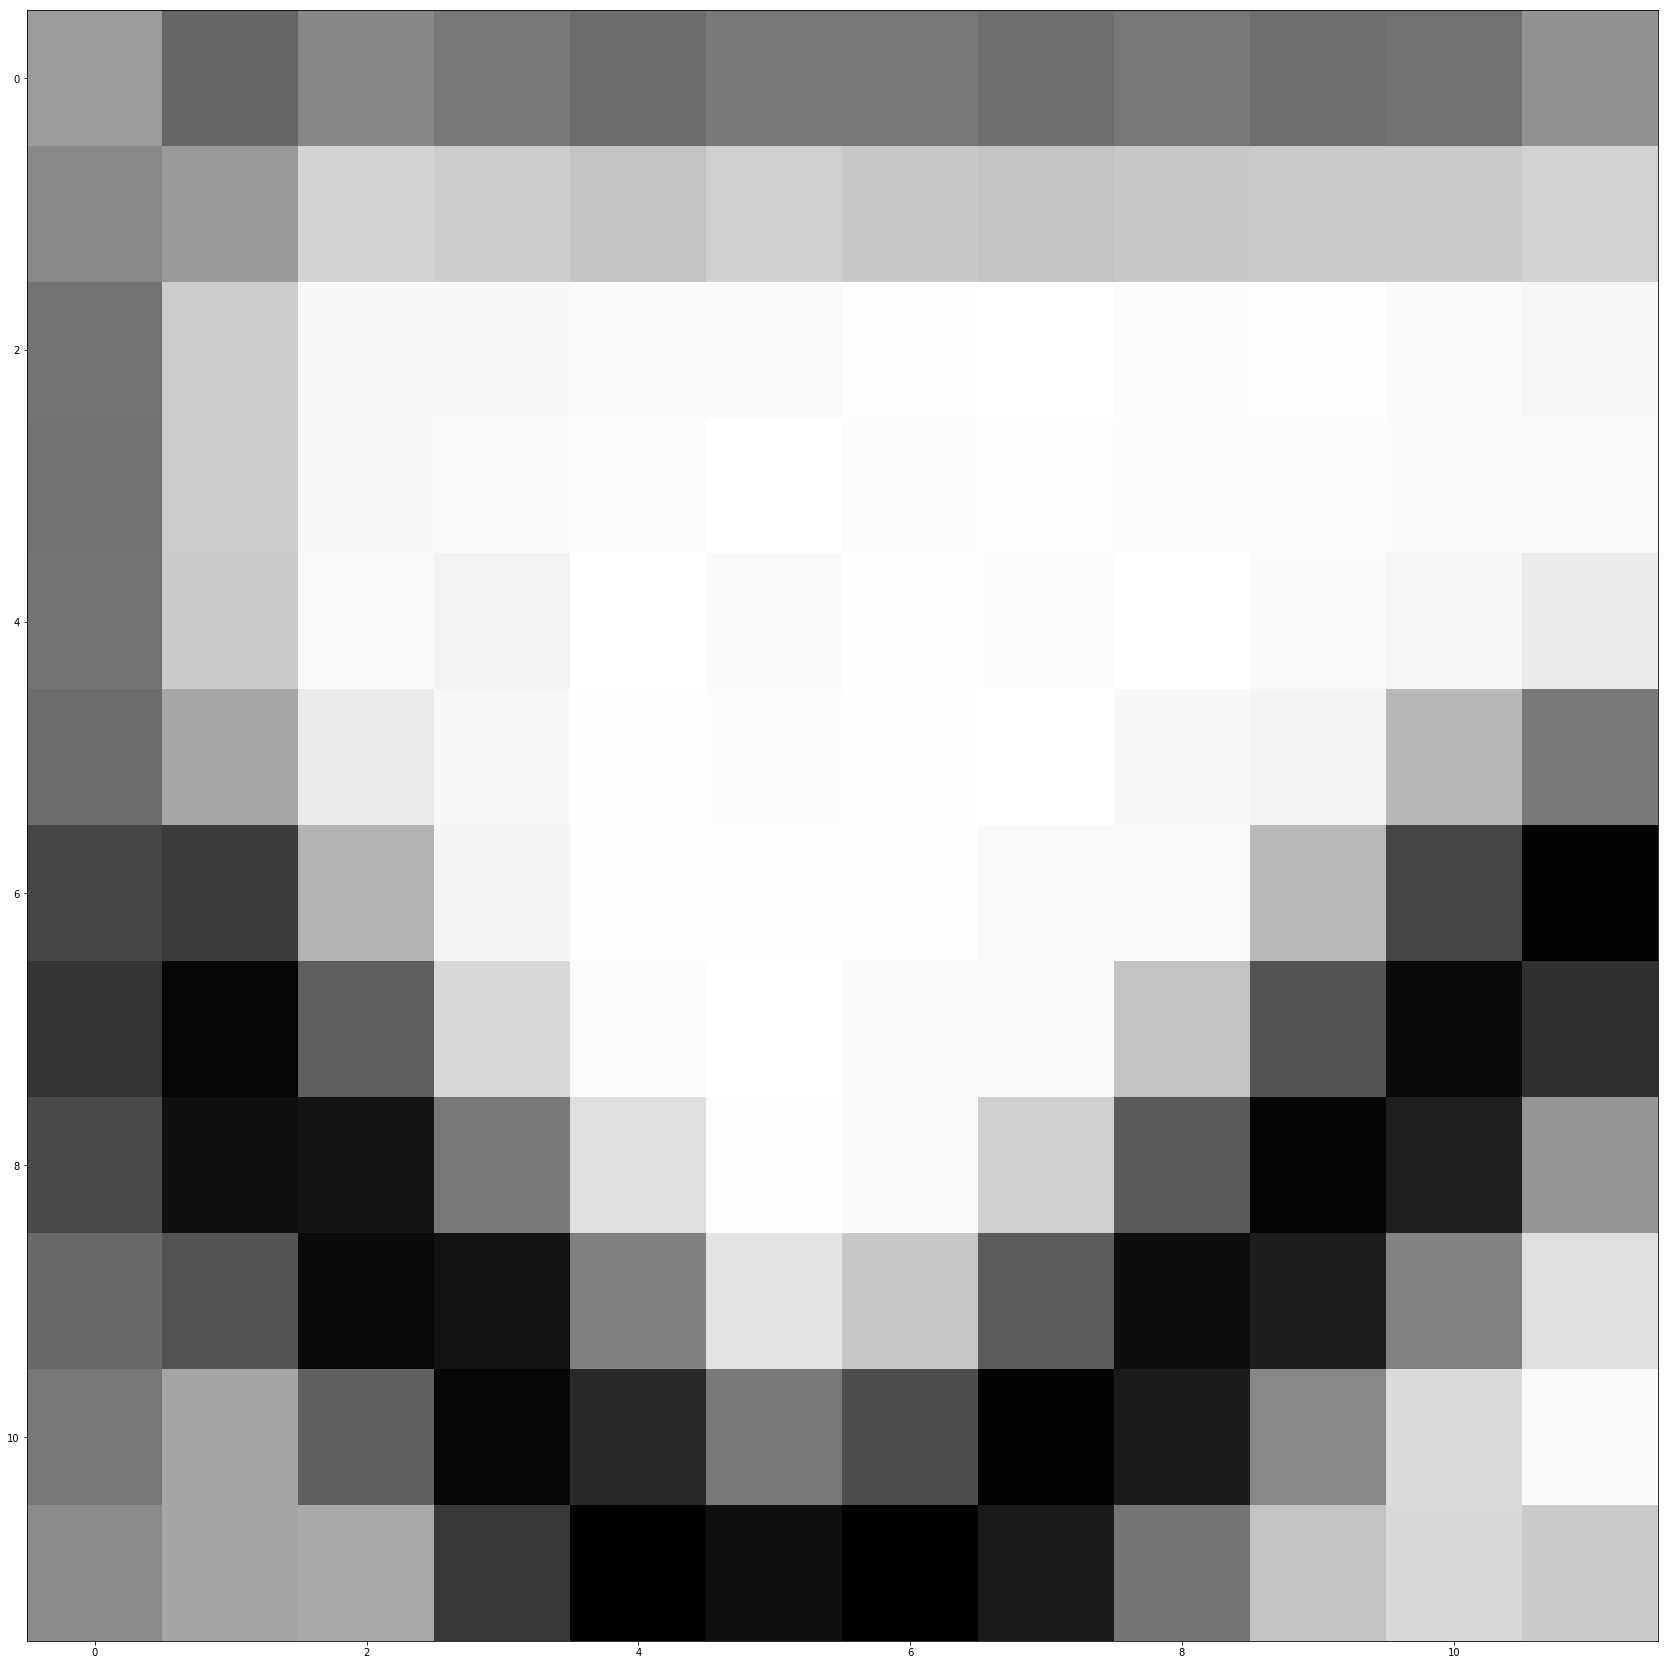

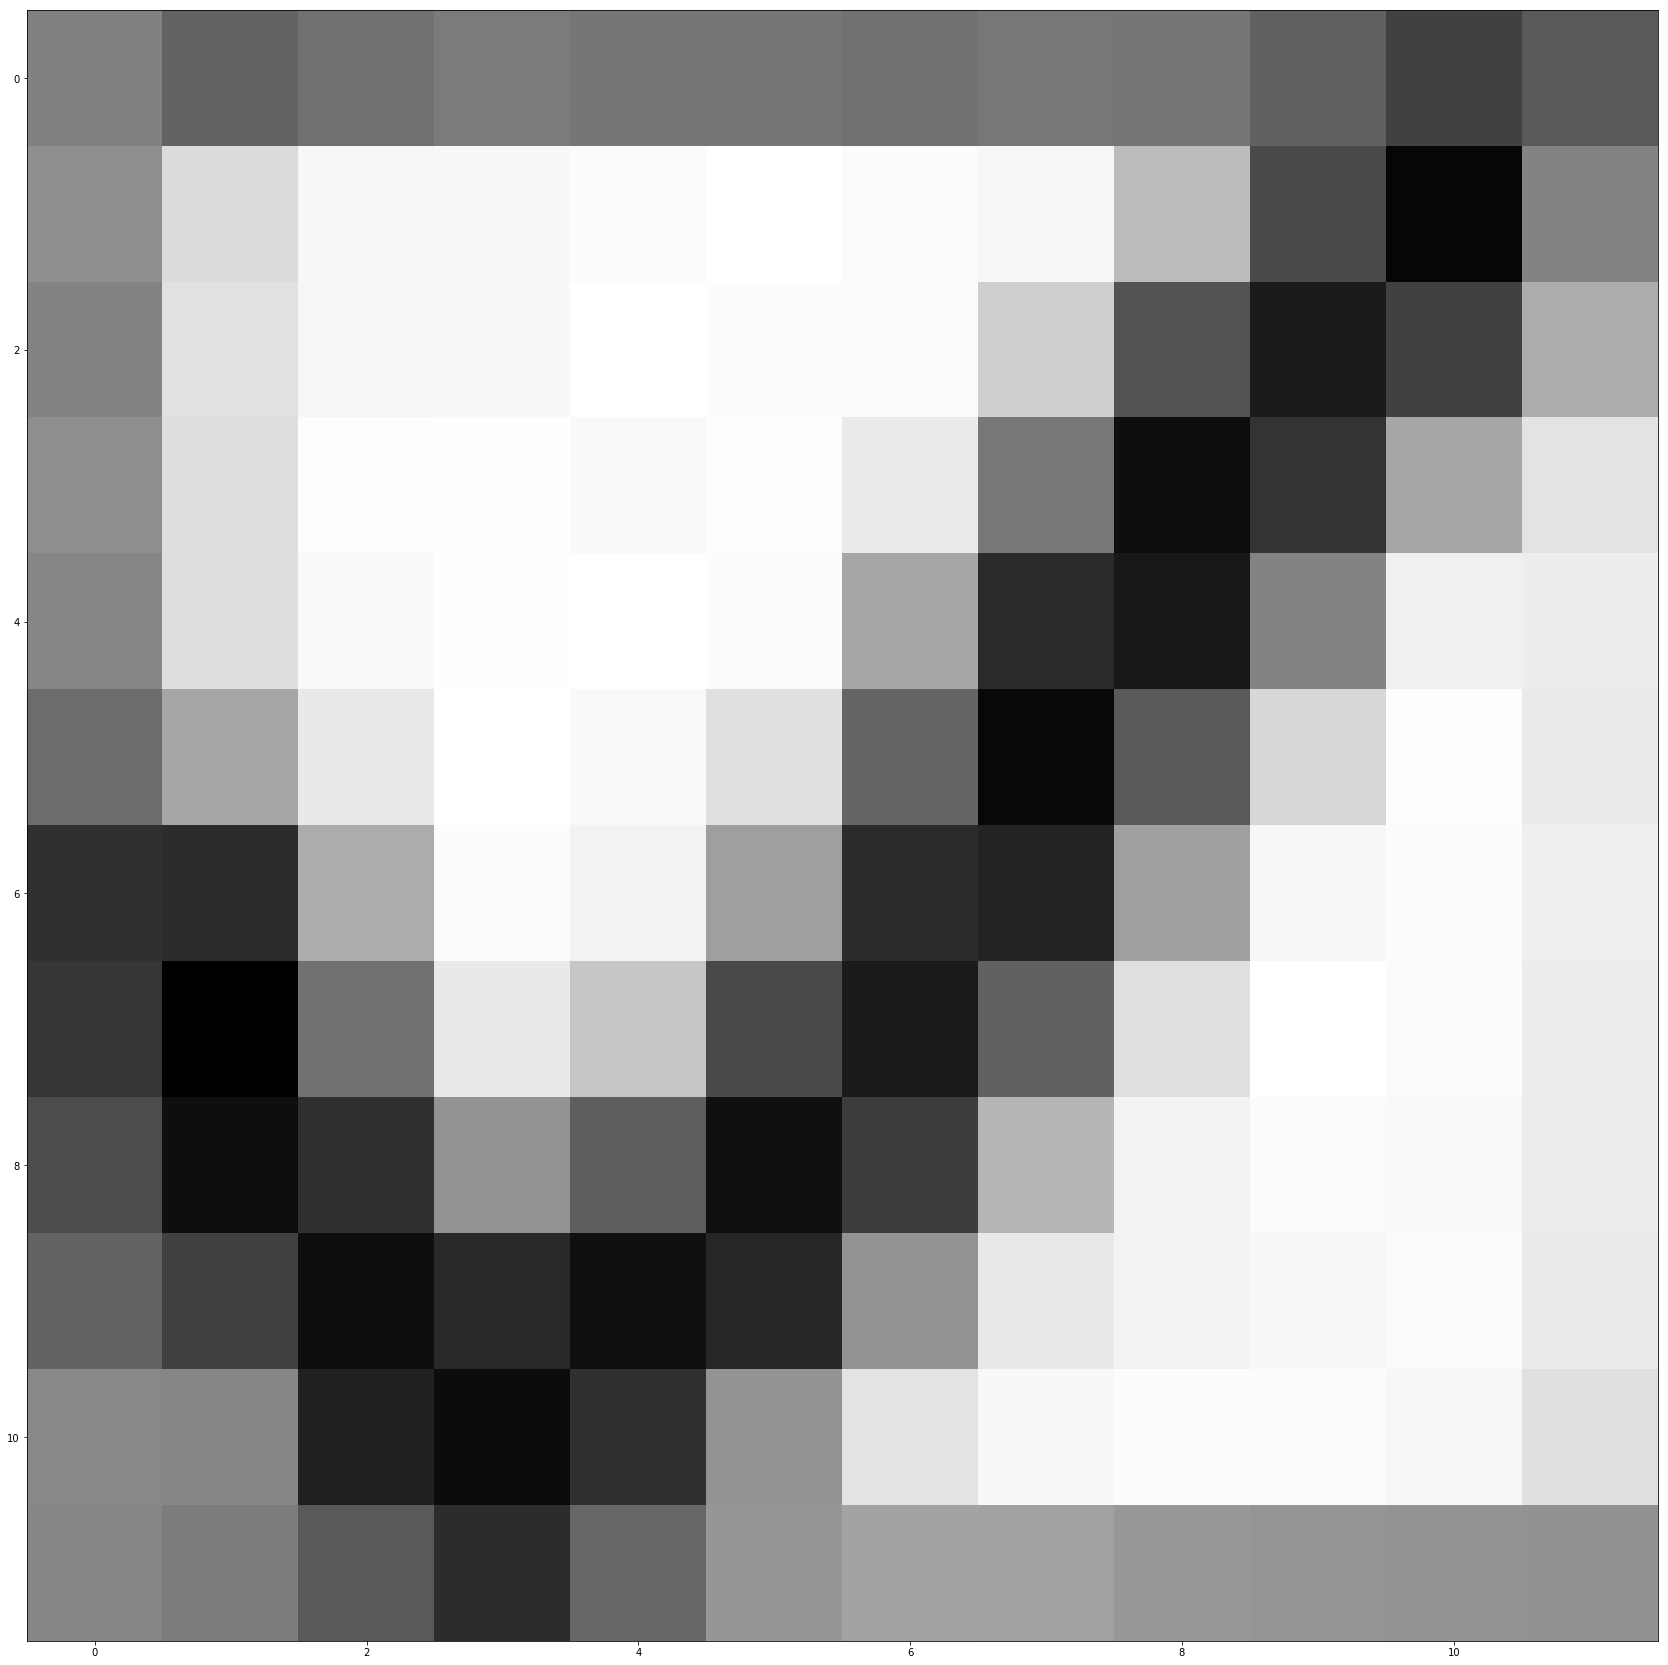

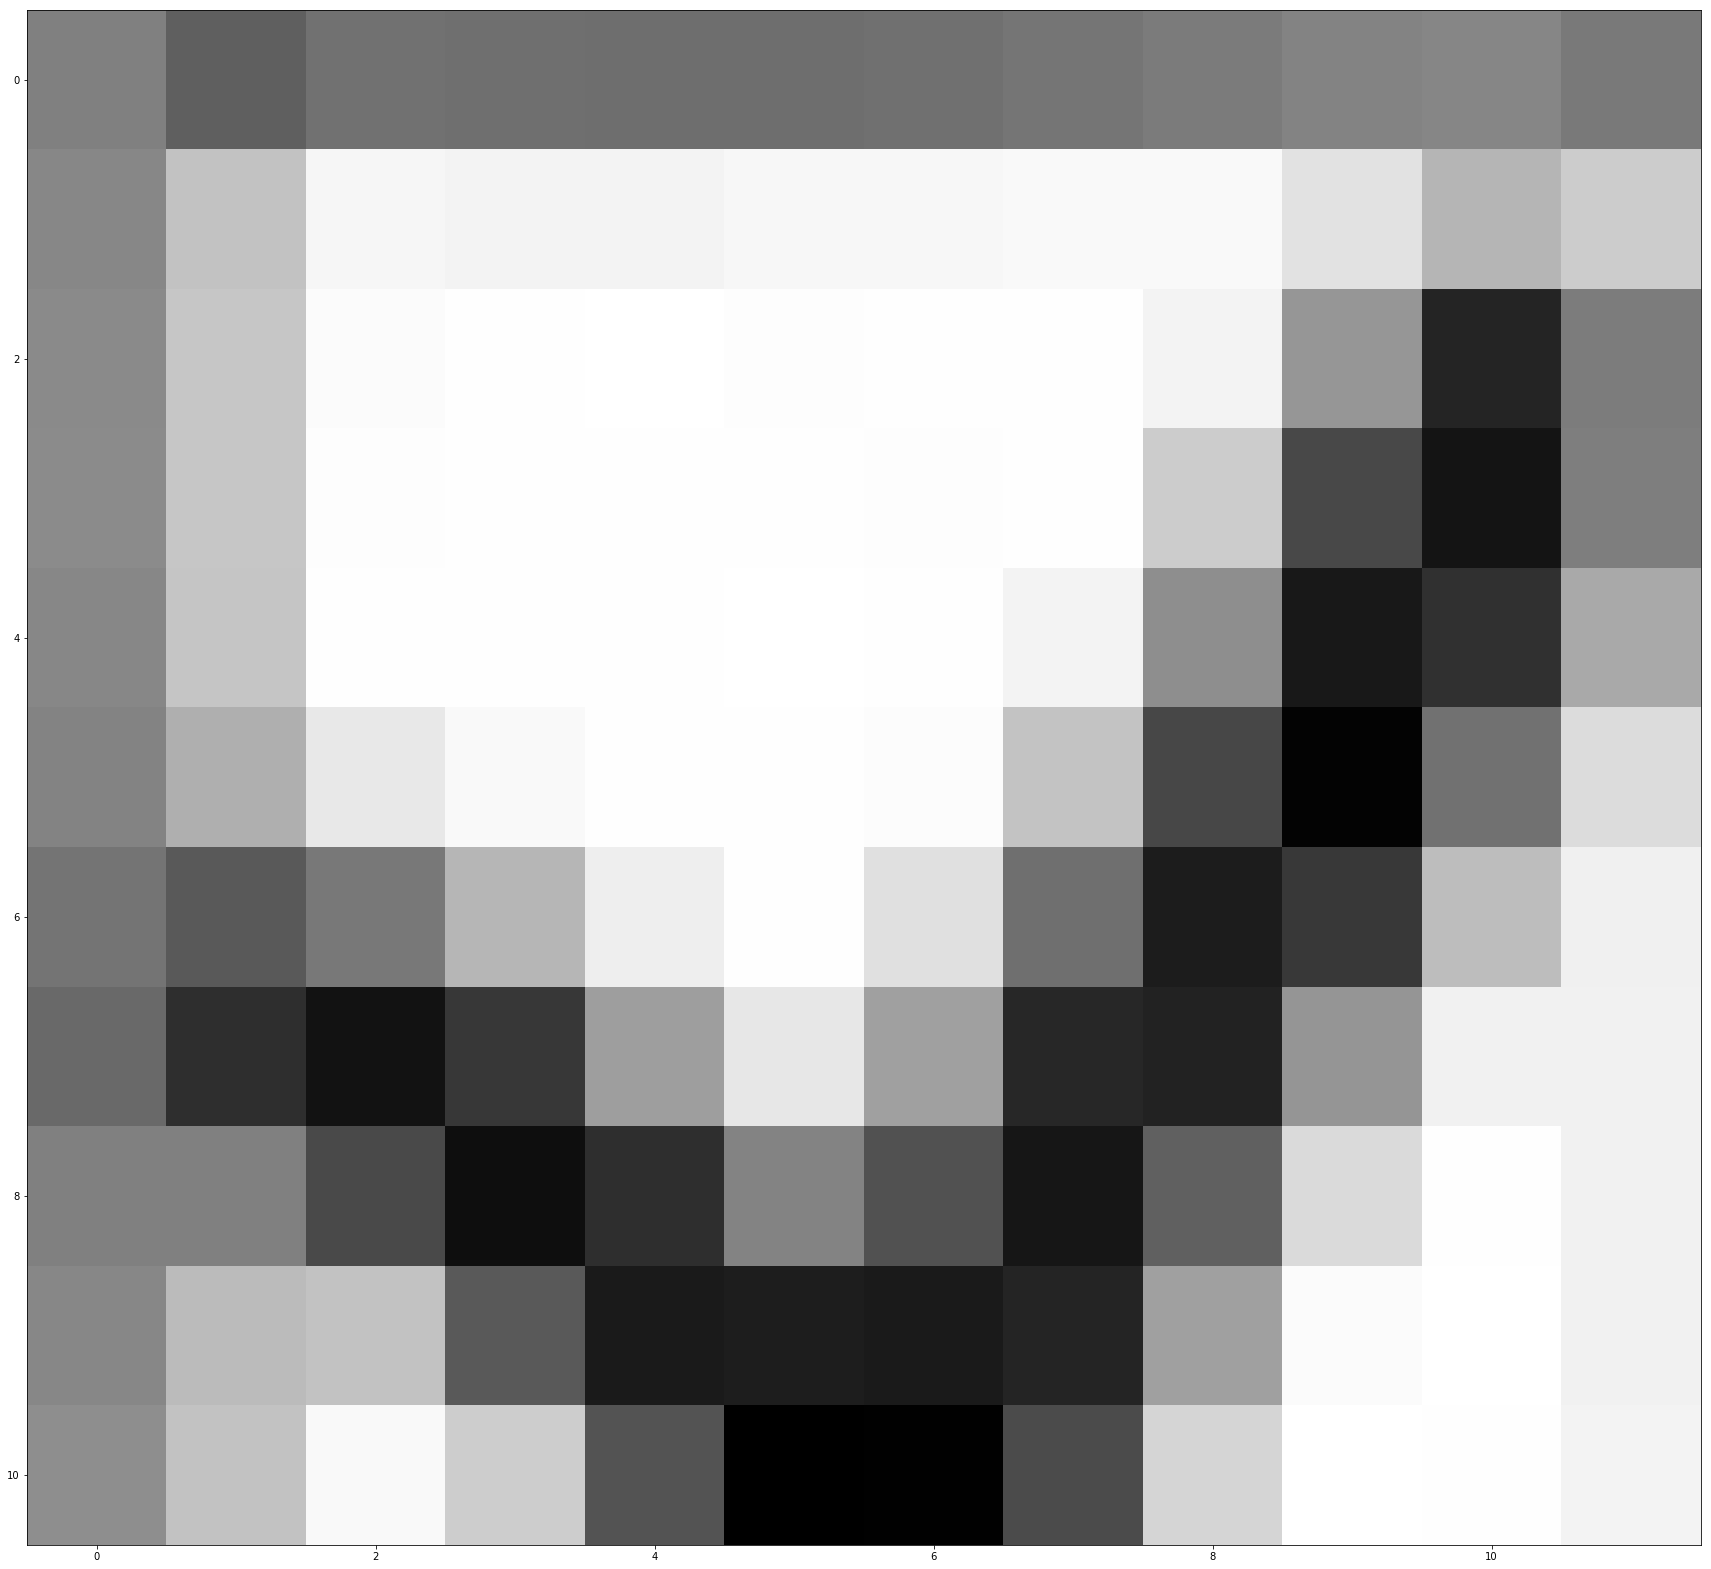

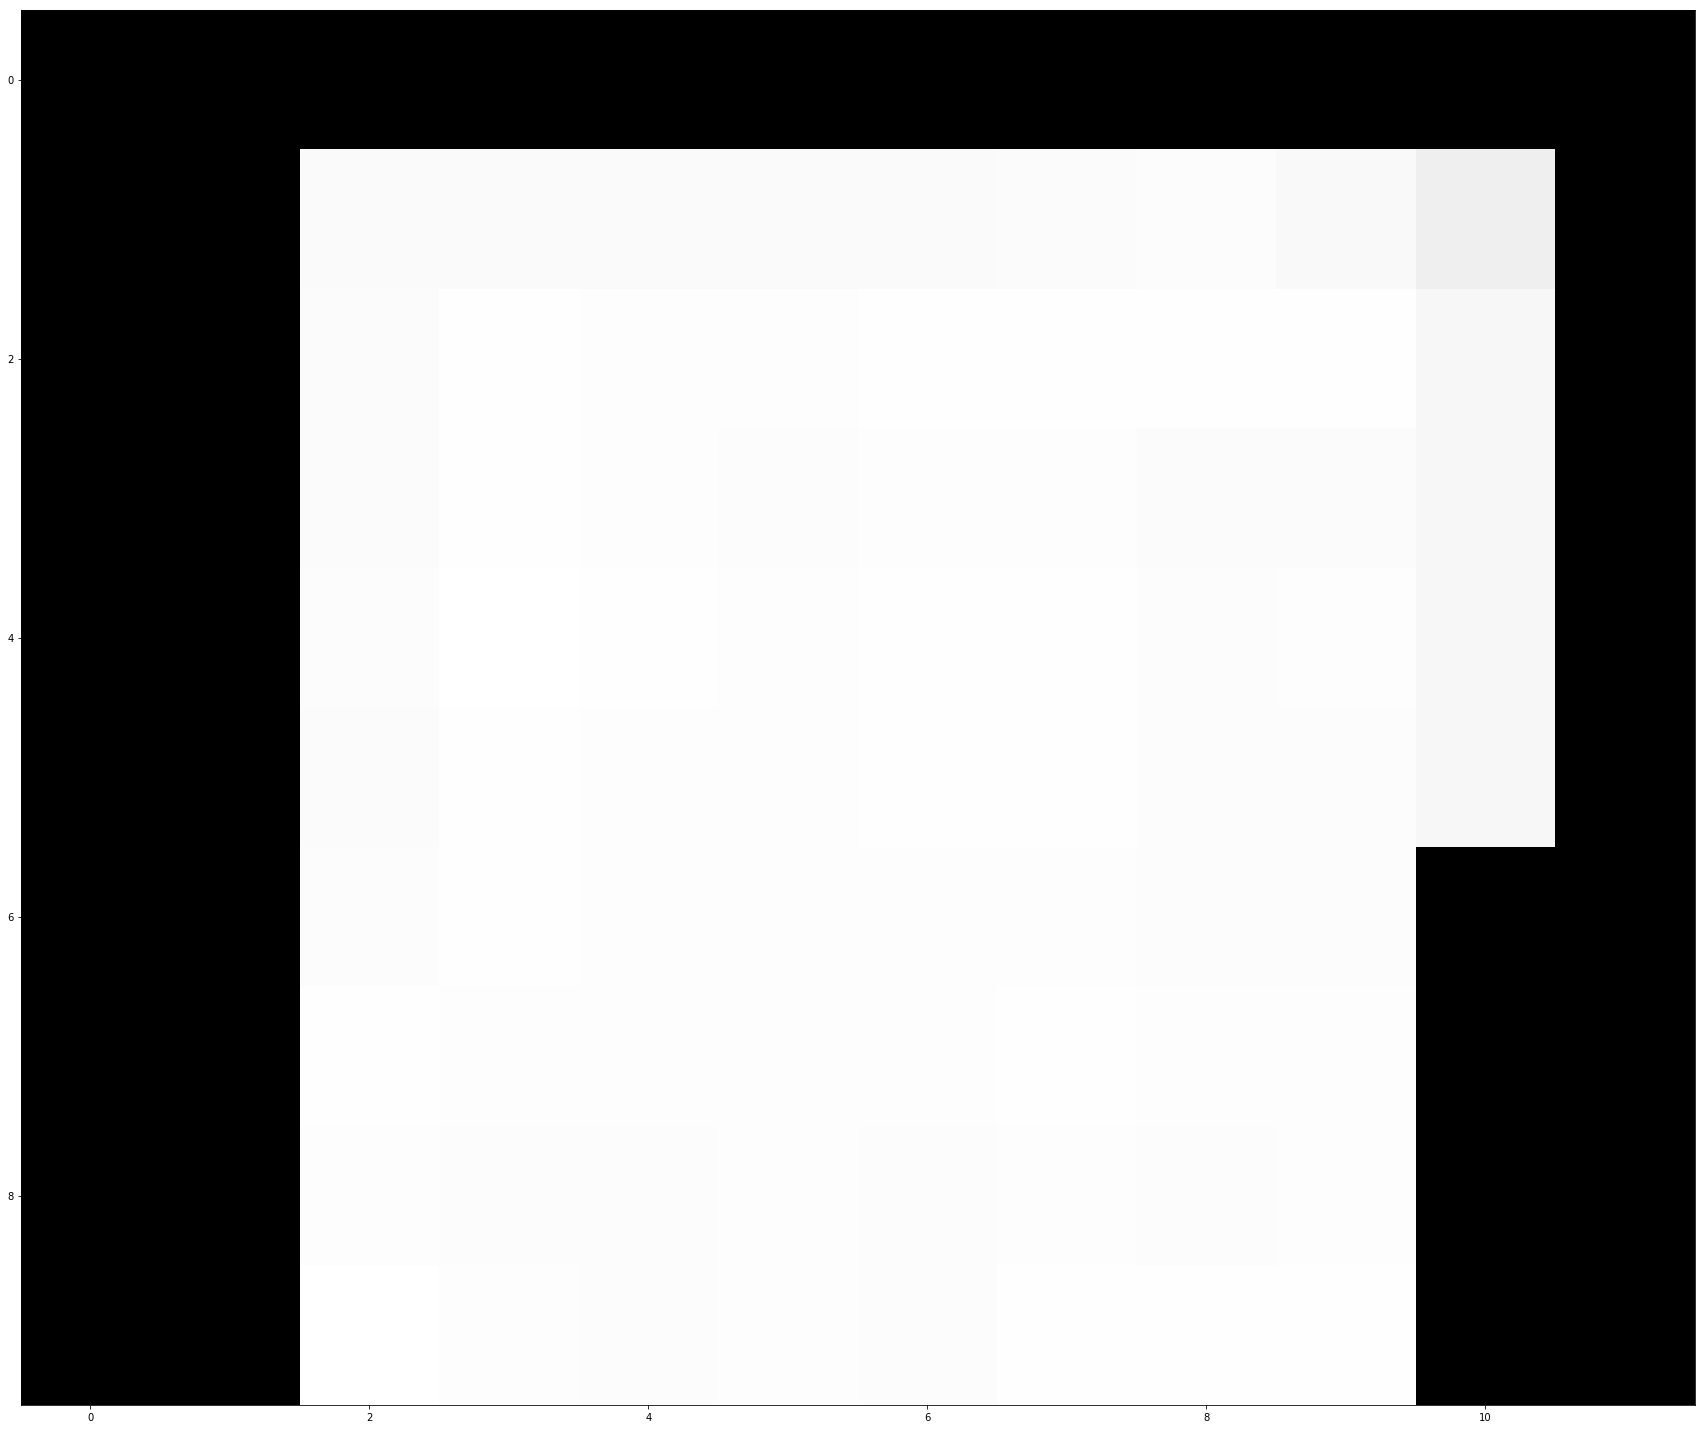

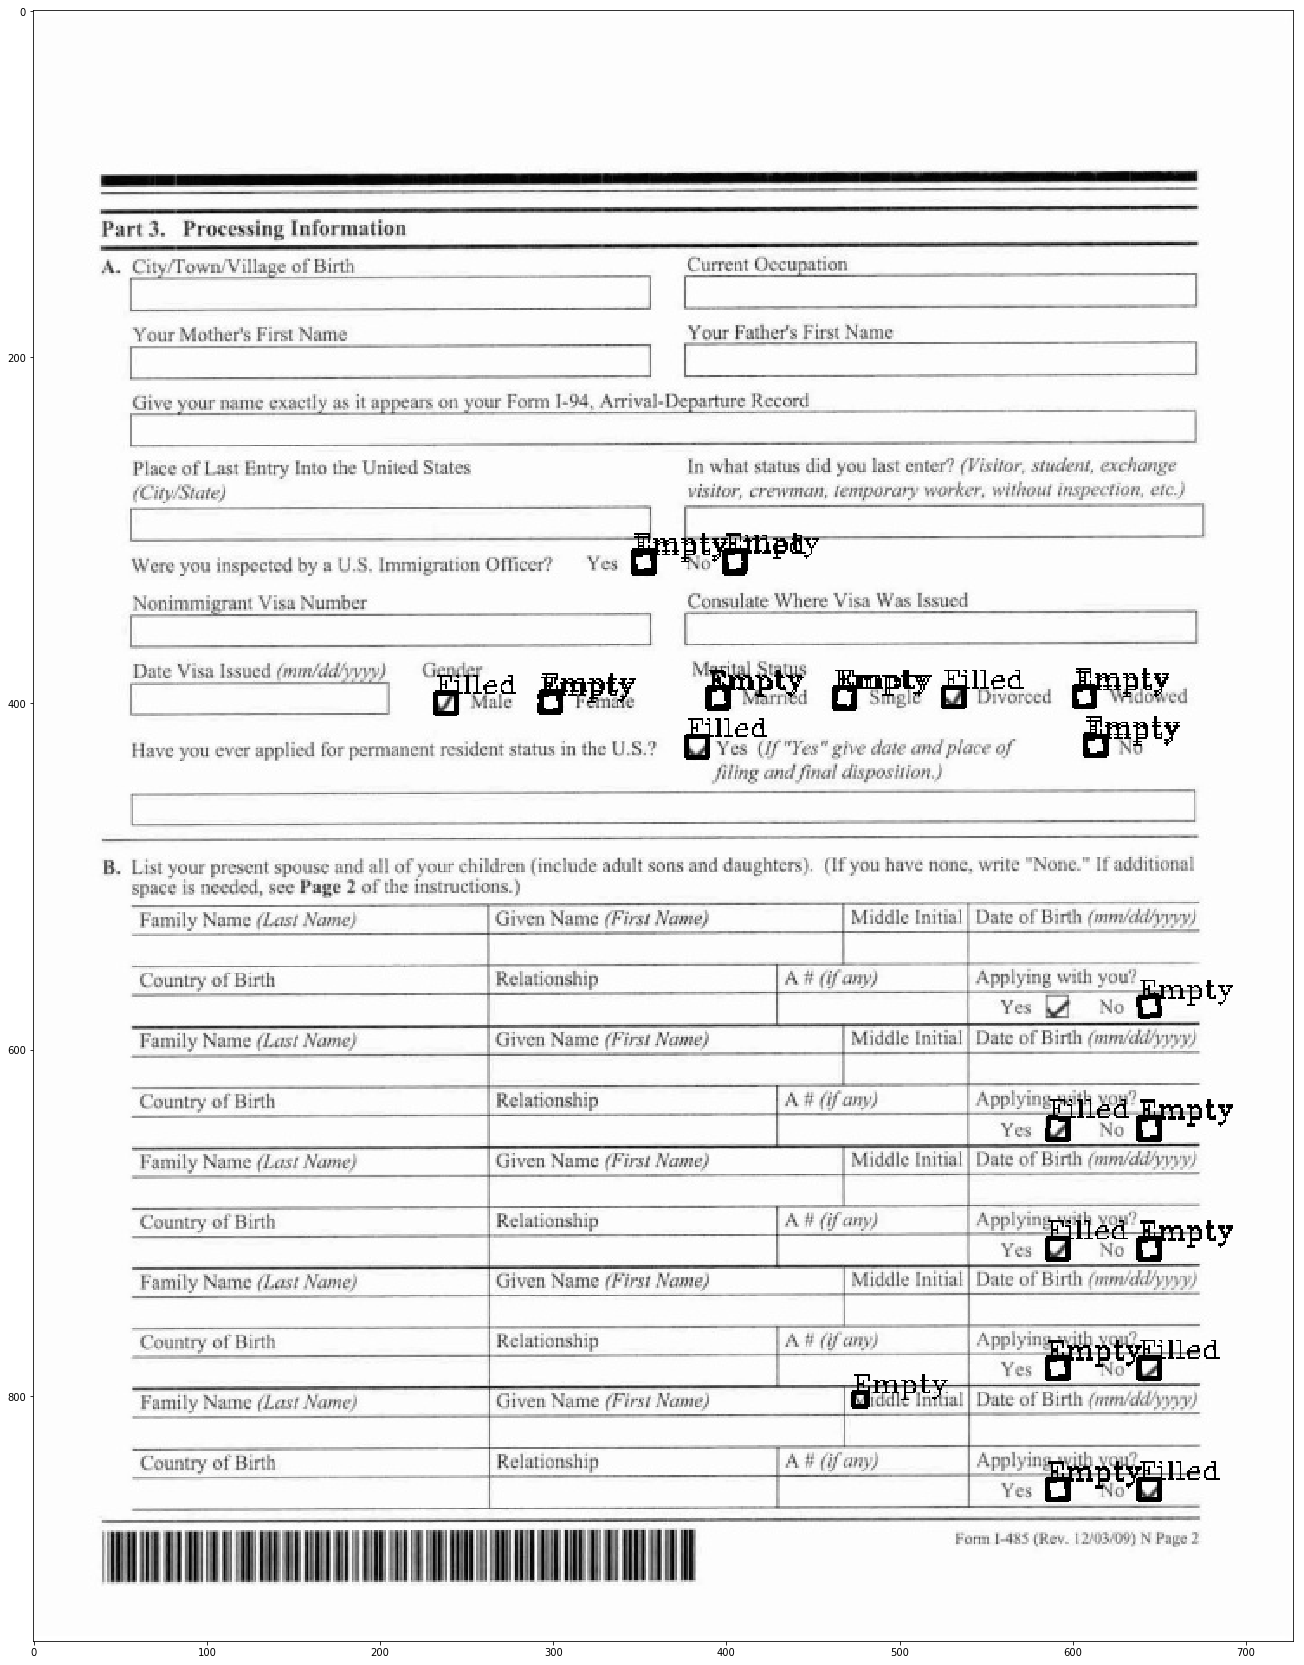

In [7]:
img = cv2.imread("./page2_filled.jpg", cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
 
font = cv2.FONT_HERSHEY_COMPLEX

document_height, document_width = img.shape[0], img.shape[1]
 
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.1*cv2.arcLength(cnt, True), True)
    coords = approx.ravel()
    x = coords[0]
    y = coords[1]

    #If quadrilateral
    if len(approx) == 4:
        feature_height, feature_width = (coords[5] - coords[1]), (coords[4] - coords[0])
        #If the size of the quadrilateral found is significant (e.g. not hidden inside text)
        if feature_width > float(document_width)/100 and feature_height > float(document_width)/100:
            #If a square (± 5 pixels)
            if abs(feature_height - feature_width) < 5:
                crop_img = img[coords[1]:coords[1] + feature_height, coords[0]:coords[0] + feature_width]
                _, crop_thresh = cv2.threshold(crop_img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                total = crop_img.shape[0] * crop_img.shape[1]
                count_black = total - cv2.countNonZero(crop_thresh)

                if count_black > float(total)/3:
                    cv2.drawContours(img, [approx], 0, (0), 2)
                    cv2.putText(img, "Filled", (x, y), font, 0.5, (0))
                else:
                    cv2.drawContours(img, [approx], 0, (0), 2)
                    cv2.putText(img, "Empty", (x, y), font, 0.5, (0))

plt_img(img)